In [1]:
import os
os.chdir('/home/jovyan/signal-extraction') # set the current working directory to the base signal-extraction folder so vae and sim files and easily be called.

In [3]:
from vae_code.mimo_vae import *

# Implementing the MIMO-AE

### Loading the reanalysis data

In [4]:
sdata1 = xr.open_dataset("./vae_input_data/sst_mon-mean.nc")
pdata1 = xr.open_dataset("./vae_input_data/tp_mon-sum.nc")

In [5]:
print(f"{pdata1}, /n {sdata1}")

<xarray.Dataset> Size: 1MB
Dimensions:          (valid_time: 1026, bnds: 2, latitude: 17, longitude: 17)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 8kB 1940-01-16 ... 2025-06-1...
  * latitude         (latitude) float64 136B 40.0 39.75 39.5 ... 36.5 36.25 36.0
  * longitude        (longitude) float64 136B -123.0 -122.8 ... -119.2 -119.0
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] 16kB ...
    tp               (valid_time, latitude, longitude) float32 1MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.5.1 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Thu Jul 24 18:32:56 2025: CDO monsum ../signal-e...
    frequency:               mon
    CDO:         

### Running the VAE

In [6]:
m1 = learn(sdata1,pdata1,"minmax",'sst','tp', 0.8, 32)

In [7]:
train_summary(m1,'./results/ERA5_norm_vae/ERA5_norm_vae_training_summary')

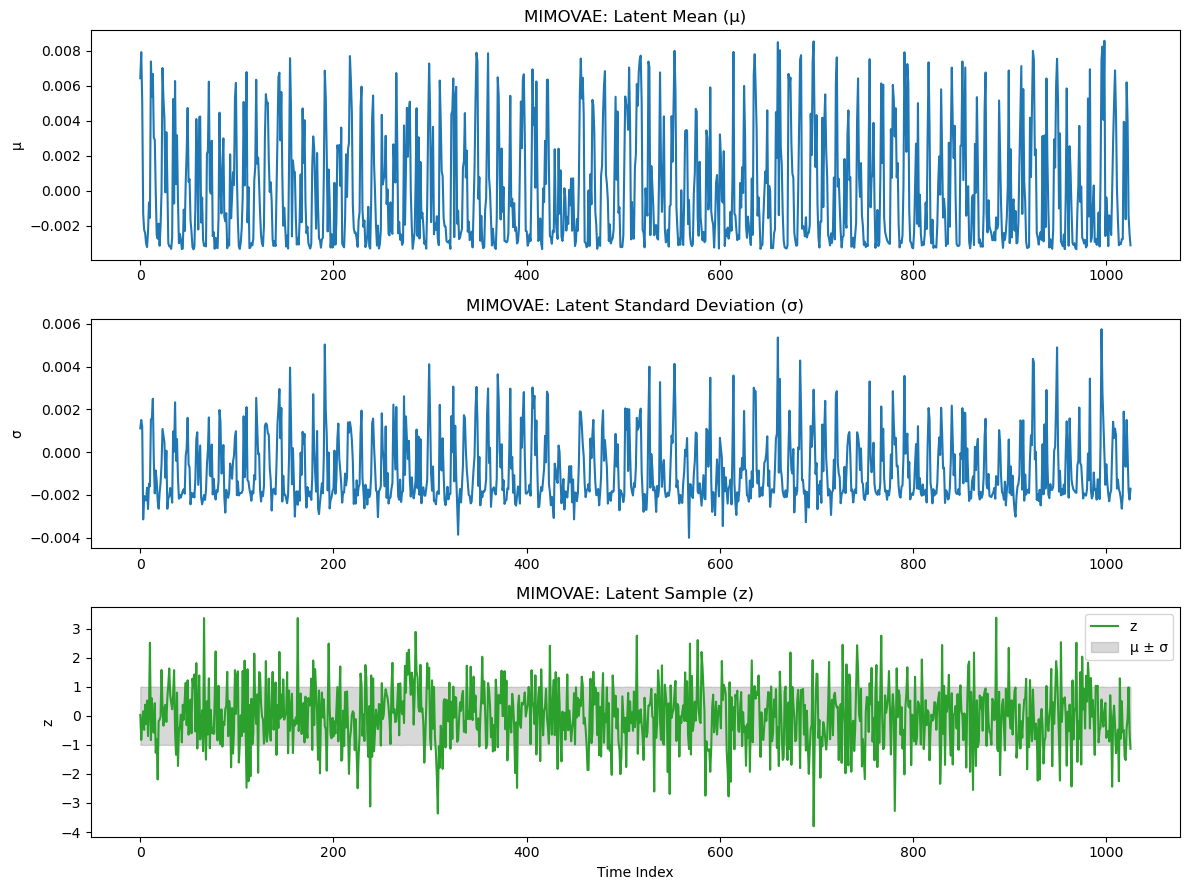

In [7]:
e1 = extractr(m1['model'],sdata1,'sst',pdata1,'tp',m1['sst_scaler'],m1['precip_scaler'],True,True,"ERA5_norm_vae_extractr_results")